# Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

# Business Goal 

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

## Step1: Importing and understanding the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

telecom = pd.read_csv("telecom_churn_data.csv")
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [2]:
telecom.shape

(99999, 226)

In [3]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [4]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## Step 2: Data cleaning & derive new columns
- Drop duplicates records
- Handle null values in numeric columns
- Filter high-value customers 
- Add churn column
- Identify columns that are highly skewed and drop them
- Handle null values 
- Handle Nan values

In [5]:
# drop duplicate records - if any
telecom.drop_duplicates(subset=None, inplace=True)
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 173.2+ MB


#### Filter high-value customers - 
Since the overall analysis is to be done on the dataset for high value customers - first we can drop off the rows that are not high value custom
As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [6]:
# first fix the null values for columns that are required to identify the high value customers
# get list of recharge columns
rechrg_cols = (telecom.columns[telecom.columns.str.contains('rech_amt|rech_data')])
print(rechrg_cols)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


In [7]:
# check null values for recharge cols
round(100*(telecom[rechrg_cols].isnull().sum()/len(telecom[rechrg_cols].index)), 2)

total_rech_amt_6             0.00
total_rech_amt_7             0.00
total_rech_amt_8             0.00
total_rech_amt_9             0.00
max_rech_amt_6               0.00
max_rech_amt_7               0.00
max_rech_amt_8               0.00
max_rech_amt_9               0.00
date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
dtype: float64

In [8]:
rechrg_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']
# update missing values with 0
telecom[rechrg_cols] = telecom[rechrg_cols].apply(lambda x: x.fillna(0))

In [9]:
# calculate the total data recharge amount for June and July - number of recharges * average recharge amount
telecom['total_data_rech_6'] = telecom.total_rech_data_6 * telecom.av_rech_amt_data_6
telecom['total_data_rech_7'] = telecom.total_rech_data_7 * telecom.av_rech_amt_data_7

# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
telecom['amt_data_6'] = telecom.total_rech_amt_6 + telecom.total_data_rech_6
telecom['amt_data_7'] = telecom.total_rech_amt_7 + telecom.total_data_rech_7

telecom['av_amt_data_6_7'] = (telecom.amt_data_6 + telecom.amt_data_7)
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(telecom.av_amt_data_6_7.quantile(0.7)))

telecom_high_val = telecom.loc[telecom.av_amt_data_6_7 > telecom.av_amt_data_6_7.quantile(0.7), :]
telecom_high_val = telecom_high_val.reset_index(drop=True)
telecom_high_val.shape

Recharge amount at 70th percentile: 956.0


(29953, 231)

## Add target column Churn

Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [10]:
telecom_high_val['churn'] = np.where(((telecom_high_val['total_ic_mou_9']==0.00) | (telecom_high_val['total_og_mou_9']==0.00)) & 
                                     ((telecom_high_val['vol_2g_mb_9']==0.00) | (telecom_high_val['vol_3g_mb_9']==0.00)), 1, 0)    
telecom_high_val['churn'].value_counts()/len(telecom_high_val) * 100

0    89.132975
1    10.867025
Name: churn, dtype: float64

<b> Observation</b> As noticed above almost 90% of high value customers are non churn and only 10% are churned

In [11]:
# After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).
drop_cols  =telecom_high_val.columns[telecom_high_val.columns.str.endswith(pat = '_9')]
telecom_high_val.drop(drop_cols, axis=1, inplace=True)
telecom_high_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29953 entries, 0 to 29952
Columns: 178 entries, mobile_number to churn
dtypes: float64(141), int32(1), int64(27), object(9)
memory usage: 40.6+ MB


In [12]:
# Identify columns that are highly skewed and drop them

drop_cols = []
for col in telecom_high_val.columns:
    if telecom_high_val[col].nunique() < 2:
        print(col,
              "\t --> ", telecom_high_val[col].unique(),
              "\t --> ", telecom_high_val[col].dtype)
        drop_cols.append(col)

circle_id 	 -->  [109] 	 -->  int64
loc_og_t2o_mou 	 -->  [ 0. nan] 	 -->  float64
std_og_t2o_mou 	 -->  [ 0. nan] 	 -->  float64
loc_ic_t2o_mou 	 -->  [ 0. nan] 	 -->  float64
last_date_of_month_6 	 -->  ['6/30/2014'] 	 -->  object
last_date_of_month_7 	 -->  ['7/31/2014' nan] 	 -->  object
last_date_of_month_8 	 -->  ['8/31/2014' nan] 	 -->  object
std_og_t2c_mou_6 	 -->  [nan  0.] 	 -->  float64
std_og_t2c_mou_7 	 -->  [nan  0.] 	 -->  float64
std_og_t2c_mou_8 	 -->  [ 0. nan] 	 -->  float64
std_ic_t2o_mou_6 	 -->  [nan  0.] 	 -->  float64
std_ic_t2o_mou_7 	 -->  [nan  0.] 	 -->  float64
std_ic_t2o_mou_8 	 -->  [ 0. nan] 	 -->  float64


In [13]:
# since these columns have only one non unique values they can be dropped off
telecom_high_val.drop(drop_cols, axis=1, inplace=True)
telecom_high_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29953 entries, 0 to 29952
Columns: 165 entries, mobile_number to churn
dtypes: float64(132), int32(1), int64(26), object(6)
memory usage: 37.6+ MB


In [14]:
# drop column where every value is unique
telecom_high_val['mobile_number'].nunique()

29953

In [15]:
# With above it can be noticed that mobile number is unique for all the records and hence does not add any value for further analysis and hence can be dropped
telecom_high_val.drop('mobile_number', axis=1, inplace=True)

In [16]:
# check for columns having null values
missing = round(100*(telecom_high_val.isnull().sum()/len(telecom_high_val.index)), 2)
missing[missing > 10]

date_of_last_rech_data_6    44.11
date_of_last_rech_data_7    43.12
date_of_last_rech_data_8    46.80
count_rech_2g_6             44.11
count_rech_2g_7             43.12
count_rech_2g_8             46.80
count_rech_3g_6             44.11
count_rech_3g_7             43.12
count_rech_3g_8             46.80
arpu_3g_6                   44.11
arpu_3g_7                   43.12
arpu_3g_8                   46.80
arpu_2g_6                   44.11
arpu_2g_7                   43.12
arpu_2g_8                   46.80
night_pck_user_6            44.11
night_pck_user_7            43.12
night_pck_user_8            46.80
fb_user_6                   44.11
fb_user_7                   43.12
fb_user_8                   46.80
dtype: float64

In [17]:
# identify columns that have Nan values
nan_cols = [i for i in telecom_high_val.columns if telecom_high_val[i].isnull().any()]
nan_cols

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou

In [18]:
telecom_high_val[nan_cols].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
count,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.00000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.00000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.00000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,16740.000000,17038.000000,15935.000000,16740.000000,17038.000000,15935.000000,16740.000000,17038.000000,15935.000000,16740.000000,17038.000000,15935.000000,16740.000000,17038.000000,15935.000000,16740.000000,17038.000000,15935.000000
mean,265.708886,272.935850,243.888097,380.688975,385.124799,348.769656,16.421142,12.876567,13.021785,27.086158,20.522376,20.699213,86.132694,87.325499,81.335840,166.319093,166.059185,157.991961,6.465337,6.543588,6.13179,1.606448,1.923151,1.771192,258.925500,259.936784,245.467775,168.955188,177.555468,154.637926,182.745959,191.386731,163.729361,1.839579,1.861677,1.651356,353.544517,370.807662,320.022119,2.215077,2.147442,2.031569,5.932425,7.236205,6.815709,0.673738,0.043743,0.060043,66.716145,67.902007,65.214092,153.247230,154.476487,152.261573,15.573525,16.338826,15.001872,235.54671,238.727204,232.487260,15.171358,15.714036,14.486670,29.750789,31.390063,29.057314,2.748564,2.852873,2.669392,47.674363,49.96069,46.216895,0.062172,0.020127,0.027629,11.000045,12.109901,11.463609,1.176512,1.529164,1.276098,2.222162,2.458974,2.273110,0.765352,0.803674,0.777659,120.055618,120.810794,118.106064,113.672310,113.907625,109.877727,0.024313,0.022010,0.021399,0.926583,0.921763,0.897207
std,462.692744,483.282132,465.505577,484.441095,501.024091,486.836956,77.012820,76.501945,75.630647,117.284108,96.967183,106.833757,230.772468,242.604091,231.568708,251.520947,242.861350,236.400416,22.325687,22.139032,19.87269,6.362330,9.222969,7.283267,380.427567,377.425594,367.

In [19]:
# Null MOU (Minutes of usage - voice calls) can be updated to 0 - with the understanding that blank indicates its not in use
nan_mou_cols = telecom_high_val.columns[telecom_high_val.columns.str.contains(pat = '_mou') & telecom_high_val.isna().any()]
nan_mou_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_

In [20]:
telecom_high_val[nan_mou_cols] = telecom_high_val[nan_mou_cols].fillna(0)

In [21]:
# same as above blank in other columns can be populated as 0
nan_oth_cols = telecom_high_val.columns[telecom_high_val.columns.str.contains(pat = '_others_') & telecom_high_val.isna().any()]
print(nan_oth_cols)
telecom_high_val[nan_oth_cols] = telecom_high_val[nan_oth_cols].fillna(0)

Index(['og_others_6', 'og_others_7', 'og_others_8', 'ic_others_6',
       'ic_others_7', 'ic_others_8'],
      dtype='object')


In [22]:
# imputing Nan for categorical columns
nan_col_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

for col in nan_col_list:
    print(telecom_high_val[col].unique())

[ 0. nan  1.]
[ 0. nan  1.]
[ 0. nan  1.]
[ 1. nan  0.]
[ 1. nan  0.]
[ 1. nan  0.]


In [23]:
# updating null as -1 for the above columns 
for col in nan_col_list:
    telecom_high_val[col] = telecom_high_val[col].fillna(-1).astype(int)

In [24]:
na_percent = round(telecom_high_val.isnull().sum() / len(telecom_high_val.index) * 100, 2)
na_percent = na_percent[na_percent > 0]
na_percent.sort_values(ascending=False)

arpu_2g_8                   46.80
count_rech_2g_8             46.80
arpu_3g_8                   46.80
date_of_last_rech_data_8    46.80
count_rech_3g_8             46.80
arpu_2g_6                   44.11
arpu_3g_6                   44.11
count_rech_3g_6             44.11
count_rech_2g_6             44.11
date_of_last_rech_data_6    44.11
count_rech_2g_7             43.12
count_rech_3g_7             43.12
date_of_last_rech_data_7    43.12
arpu_3g_7                   43.12
arpu_2g_7                   43.12
date_of_last_rech_8          1.94
date_of_last_rech_7          0.33
date_of_last_rech_6          0.24
dtype: float64

In [25]:
# Impute NaN values with end of month date by default
telecom_high_val.date_of_last_rech_6.fillna('6/30/2014', inplace=True)
telecom_high_val.date_of_last_rech_7.fillna('7/31/2014', inplace=True)
telecom_high_val.date_of_last_rech_8.fillna('8/31/2014', inplace=True)

telecom_high_val.date_of_last_rech_data_6.fillna('6/30/2014', inplace=True)
telecom_high_val.date_of_last_rech_data_7.fillna('7/31/2014', inplace=True)
telecom_high_val.date_of_last_rech_data_8.fillna('8/31/2014', inplace=True)

In [26]:
# As can be seen that the same count as of date has Nan values and hence can be populated as 0
nan_col_list = ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
               'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8']

for col in nan_col_list:
    telecom_high_val[col] = telecom_high_val[col].fillna(0)

In [27]:
# check for categorical columns
cat_cols = telecom_high_val.select_dtypes(include='object')
cat_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29953 entries, 0 to 29952
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date_of_last_rech_6       29953 non-null  object
 1   date_of_last_rech_7       29953 non-null  object
 2   date_of_last_rech_8       29953 non-null  object
 3   date_of_last_rech_data_6  29953 non-null  object
 4   date_of_last_rech_data_7  29953 non-null  object
 5   date_of_last_rech_data_8  29953 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


In [28]:
# as can be seen these categorical columns can be dropped off 
telecom_high_val.drop(cat_cols.columns, axis=1, inplace=True)
telecom_high_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29953 entries, 0 to 29952
Columns: 158 entries, arpu_6 to churn
dtypes: float64(126), int32(7), int64(25)
memory usage: 35.3 MB


In [29]:
# Create correlation matrix
corr_matrix = telecom_high_val.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9
corr_columns = [column for column in upper.columns if any(upper[column] > 0.8)]
print(corr_columns)

['onnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'amt_data_6', 'amt_data_7', 'av_amt_data_6_7']


In [30]:
# Drop highly Correlated columns
telecom_high_val.drop(corr_columns, axis = 1, inplace = True)
telecom_high_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29953 entries, 0 to 29952
Data columns (total 100 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arpu_6              29953 non-null  float64
 1   arpu_7              29953 non-null  float64
 2   arpu_8              29953 non-null  float64
 3   onnet_mou_6         29953 non-null  float64
 4   onnet_mou_7         29953 non-null  float64
 5   offnet_mou_6        29953 non-null  float64
 6   offnet_mou_7        29953 non-null  float64
 7   offnet_mou_8        29953 non-null  float64
 8   roam_ic_mou_6       29953 non-null  float64
 9   roam_ic_mou_7       29953 non-null  float64
 10  roam_ic_mou_8       29953 non-null  float64
 11  roam_og_mou_6       29953 non-null  float64
 12  roam_og_mou_7       29953 non-null  float64
 13  roam_og_mou_8       29953 non-null  float64
 14  loc_og_t2t_mou_6    29953 non-null  float64
 15  loc_og_t2t_mou_7    29953 non-null  float64
 16  loc

In [31]:
# identify numeric and categorical columns
num_df = telecom_high_val.select_dtypes(include='number')
cat_df = telecom_high_val.select_dtypes(include='object')
print(num_df.info())
print('----------')
print(cat_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29953 entries, 0 to 29952
Data columns (total 100 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arpu_6              29953 non-null  float64
 1   arpu_7              29953 non-null  float64
 2   arpu_8              29953 non-null  float64
 3   onnet_mou_6         29953 non-null  float64
 4   onnet_mou_7         29953 non-null  float64
 5   offnet_mou_6        29953 non-null  float64
 6   offnet_mou_7        29953 non-null  float64
 7   offnet_mou_8        29953 non-null  float64
 8   roam_ic_mou_6       29953 non-null  float64
 9   roam_ic_mou_7       29953 non-null  float64
 10  roam_ic_mou_8       29953 non-null  float64
 11  roam_og_mou_6       29953 non-null  float64
 12  roam_og_mou_7       29953 non-null  float64
 13  roam_og_mou_8       29953 non-null  float64
 14  loc_og_t2t_mou_6    29953 non-null  float64
 15  loc_og_t2t_mou_7    29953 non-null  float64
 16  loc

In [32]:
telecom_high_val.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,1.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,1
1,1069.180,1349.850,3171.480,57.84,54.68,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,308.63,447.38,62.13,53.23,0.0,0.0,0.00,6.66,20.08,16.68,60.86,75.14,77.84,0.0,4.5,0.0,6.50,0.0,0.0,0.0,58.14,217.56,221.49,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1,-1,-1,0,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,1
2,378.721,492.223,137.362,413.69,351.03,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,80.96,70.58,0.00,0.00,0.0,0.0,7.15,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.0,0.0,10.23,0.0,0.0,0.0,23.84,57.58,13.98,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,0.0,0.0,0.0,177.0,0.00,356.00,0.03,0.00,750.95,11.94,-1,0,0,0,1,0,315,21.03,910.65,122.16,0.00,0.0,354.0,0
3,514.453,597.753,637.760,102.41,132.11,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,91.81,87.93,0.75,1.58,0.0,0.0,0.00,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.0,0.0,0.00,0.0,0.0,0.0,2.48,118.23,74.63,4.61,2.84,10.39,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,50,50,50,30,20,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1,-1,-1,0,0,0,720,0.00,0.00,0.00,0.00,0.0,0.0,0
4,74.350,193.897,366.966,48.96,50.66,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,82.94,83.01,0.00,0.00,0.0,0.0,17.71,0.00,0.00,0.00,2.36,6.35,39.61,0.0,0.1,0.0,17.71,0.0,0.0,0.0,20.71,95.91,113.36,0.00,0.00,0.71,0.51,0.00,13.38,2.43,14.89,43.91,0.00,0.00,0.00,0.00,0.0,0.0,0.00,28.23,3.74,0.00,5.35,13.06,3,5,4,0,179,179,0,179,0,0.0,2.0,2.0,0.0,179.0,179.0,0.0,2.0,2.0,0.0,356.0,0.00,0.48,0.01,0.00,599.09,1009.92,-1,0,0,0,0,0,604,40.45,51.86,0.00,0.00,0.0,712.0,0


In [33]:
telecom_high_val['aon'].unique()

array([ 968,  802,  315, ..., 3511, 3562, 3545], dtype=int64)

In [34]:
# as AON(age on network in terms of days ) column has a high variance - we can convert it into years
telecom_high_val['aon']= round(telecom_high_val['aon']/365).astype(int)
telecom_high_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29953 entries, 0 to 29952
Data columns (total 100 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arpu_6              29953 non-null  float64
 1   arpu_7              29953 non-null  float64
 2   arpu_8              29953 non-null  float64
 3   onnet_mou_6         29953 non-null  float64
 4   onnet_mou_7         29953 non-null  float64
 5   offnet_mou_6        29953 non-null  float64
 6   offnet_mou_7        29953 non-null  float64
 7   offnet_mou_8        29953 non-null  float64
 8   roam_ic_mou_6       29953 non-null  float64
 9   roam_ic_mou_7       29953 non-null  float64
 10  roam_ic_mou_8       29953 non-null  float64
 11  roam_og_mou_6       29953 non-null  float64
 12  roam_og_mou_7       29953 non-null  float64
 13  roam_og_mou_8       29953 non-null  float64
 14  loc_og_t2t_mou_6    29953 non-null  float64
 15  loc_og_t2t_mou_7    29953 non-null  float64
 16  loc

In [35]:
# check for columns with highly skewed data (more than 95% data in column is associated with same value)

cols=telecom_high_val.select_dtypes(['int64','float64','object']).columns

skewed_cols = []

for col in cols:
    if ((telecom_high_val[col].value_counts().max()*100)/len(telecom_high_val.index)) > 95:
        skewed_cols.append(col)
        
print(skewed_cols)

['og_others_7', 'og_others_8']


All the above columns have highly skewed data (i.e. more than 95% of the columns have the same value). Hence these columns can be dropped from the dataframe for further analysis

In [36]:
telecom_high_val.drop(skewed_cols, axis = 1, inplace = True)

In [37]:
# identify numeric features
numerical_features = [x for x in telecom_high_val.columns if telecom_high_val[x].dtypes != 'object']
print(numerical_features)

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_

In [38]:
# identify continous numeric variables
continuous_features=[x for x in numerical_features if len(telecom_high_val[x].unique())>=25]
print(continuous_features)

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_

##  Univariate Analysis

In [39]:
sns.set(style="darkgrid")
def plot_graph(x_var,data_df,x_label,title,hue_var=None,rot_flag=0, y_var=None, graph_style='countplot', order_var=None, fig_size_x=20,fig_size_y=5):
    ncount = len(telecom_high_val)
    dims = (fig_size_x,fig_size_y)
    #plt.figure(figsize=dims)
    
    if graph_style == 'countplot':
        ax = sns.countplot(x=x_var, data=data_df,hue=hue_var,palette="Set3", order=order_var)
        plt.title(title)
        plt.xlabel(x_label)    
        
        # Make twin axis
        ax2=ax.twinx()

        # count axis on right, frequency on left
        ax2.yaxis.tick_left()
        ax.yaxis.tick_right()       

        # Also switch the labels over
        ax.yaxis.set_label_position('right')
        ax2.yaxis.set_label_position('left')
        if(rot_flag==1):
            ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
            plt.tight_layout()
        ax2.set_ylabel('Frequency [%]')

        for p in ax.patches:
            x=p.get_bbox().get_points()[:,0]
            y=p.get_bbox().get_points()[1,1]
            ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), ha='center', va='bottom')
        
        ax2.grid(None)
                
    elif graph_style == 'boxplot':
        ax = sns.boxplot(x=x_var, y=y_var, hue=hue_var, data=data_df, order=order_var)        
    elif graph_style == 'barplot':
        plt.figure(figsize=(20,5))
        ax = sns.barplot(x=x_var, y=y_var, hue=hue_var, data=data_df, estimator=np.mean, order=order_var)
    
    ax.yaxis.set_label_position('right')
    ax.yaxis.tick_right() 
    plt.title(title)
    plt.xlabel(x_label)   

In [40]:
# identify discrete numeric variables
discrete_features=[x for x in numerical_features if len(telecom_high_val[x].unique())<25]
print(discrete_features)

['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'aon', 'churn']


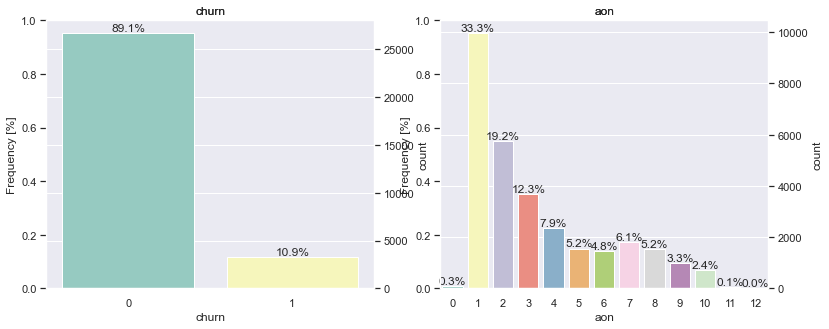

In [41]:
plt.figure(figsize=(20,70))

plt.subplot(12, 3, 1)
plot_graph('churn',telecom_high_val,'churn','churn',None,0, None, 'countplot', None, 5,5)

plt.subplot(12, 3, 2)
plot_graph('aon',telecom_high_val,'aon','aon',None,0, None, 'countplot', None, 5,5)

plt.show()

<b>Observation: </b> 
- As can be seen that the churn rate is highly skewed towards Non churn (0)
- Most of the customers are part of this telecom network since only a year

## Bivariate analysis

In [42]:
telecom_high_val.dtypes

arpu_6                float64
arpu_7                float64
arpu_8                float64
onnet_mou_6           float64
onnet_mou_7           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
loc_og_t2t_mou_6      float64
loc_og_t2t_mou_7      float64
loc_og_t2m_mou_6      float64
loc_og_t2m_mou_7      float64
loc_og_t2f_mou_6      float64
loc_og_t2f_mou_8      float64
loc_og_t2c_mou_6      float64
loc_og_t2c_mou_7      float64
loc_og_t2c_mou_8      float64
std_og_t2f_mou_6      float64
std_og_t2f_mou_7      float64
std_og_t2f_mou_8      float64
std_og_mou_6          float64
std_og_mou_7          float64
std_og_mou_8          float64
isd_og_mou_6          float64
spl_og_mou_6          float64
spl_og_mou_7          float64
spl_og_mou_8          float64
og_others_

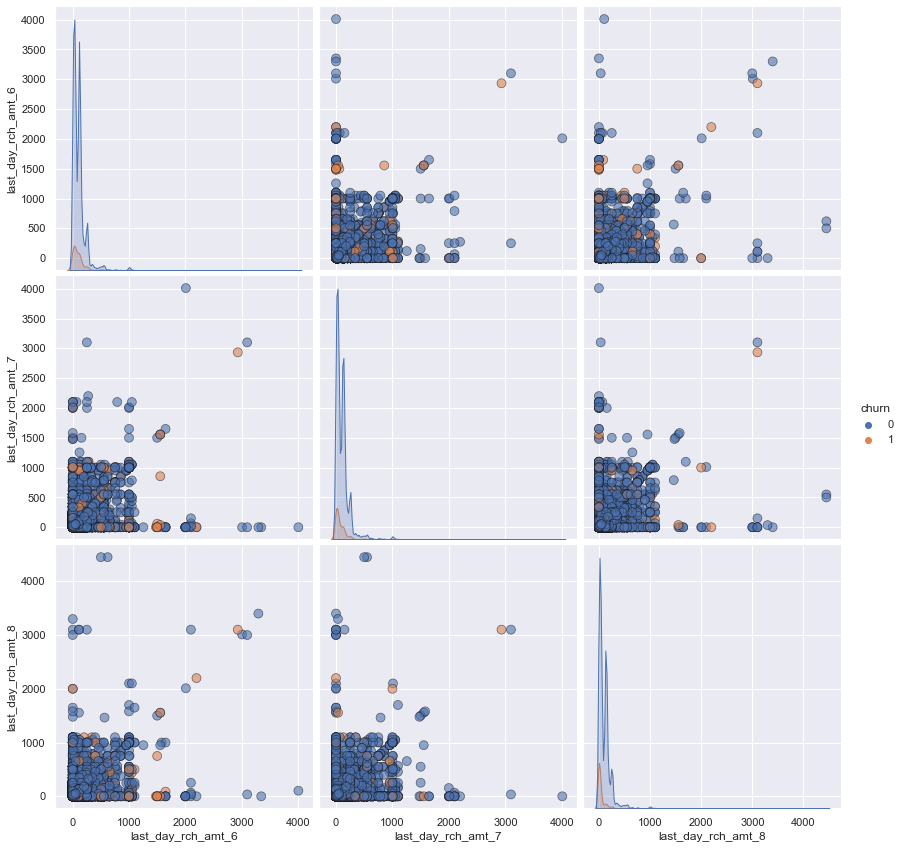

In [43]:
sns.pairplot(telecom_high_val[['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','churn']], hue = 'churn', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

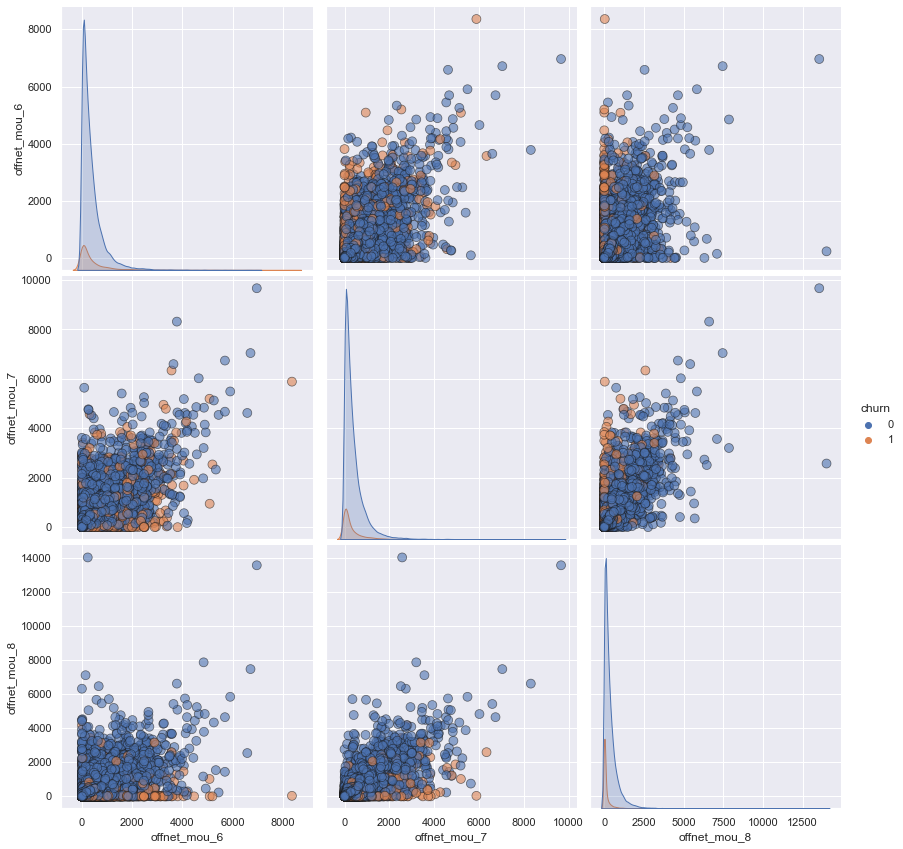

In [44]:
sns.pairplot(telecom_high_val[['offnet_mou_6','offnet_mou_7','offnet_mou_8','churn']], hue = 'churn', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4)

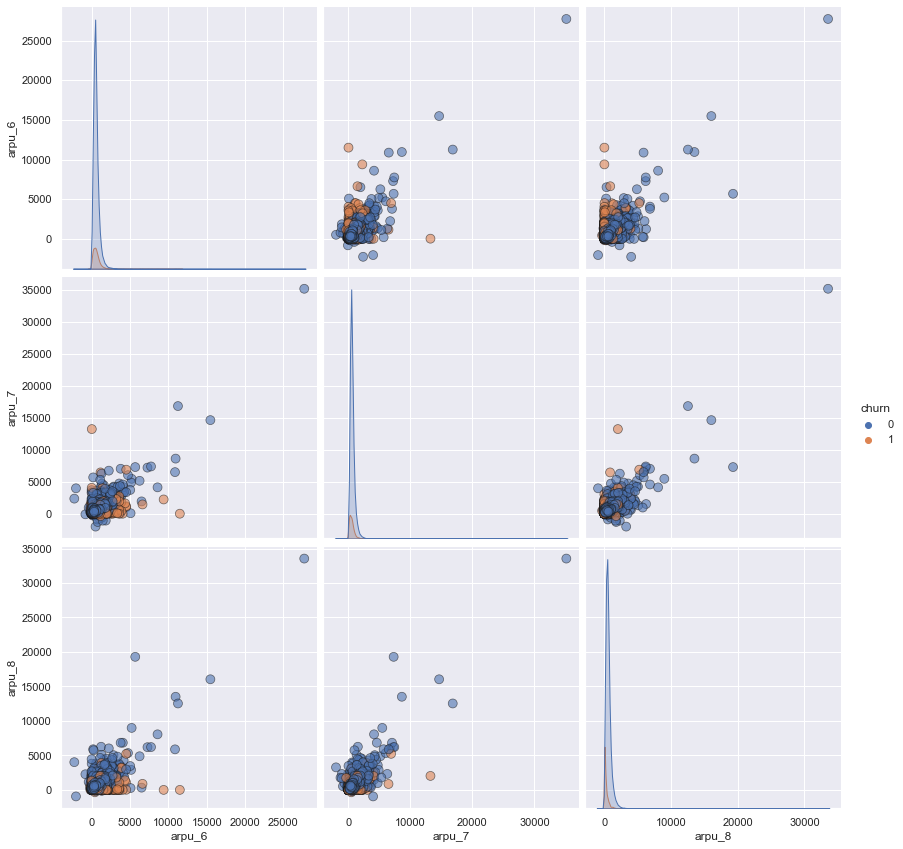

In [45]:
# Plot arpu vs churn
sns.pairplot(telecom_high_val, 
             vars = ['arpu_6', 'arpu_7', 'arpu_8'], 
             hue = 'churn', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4);

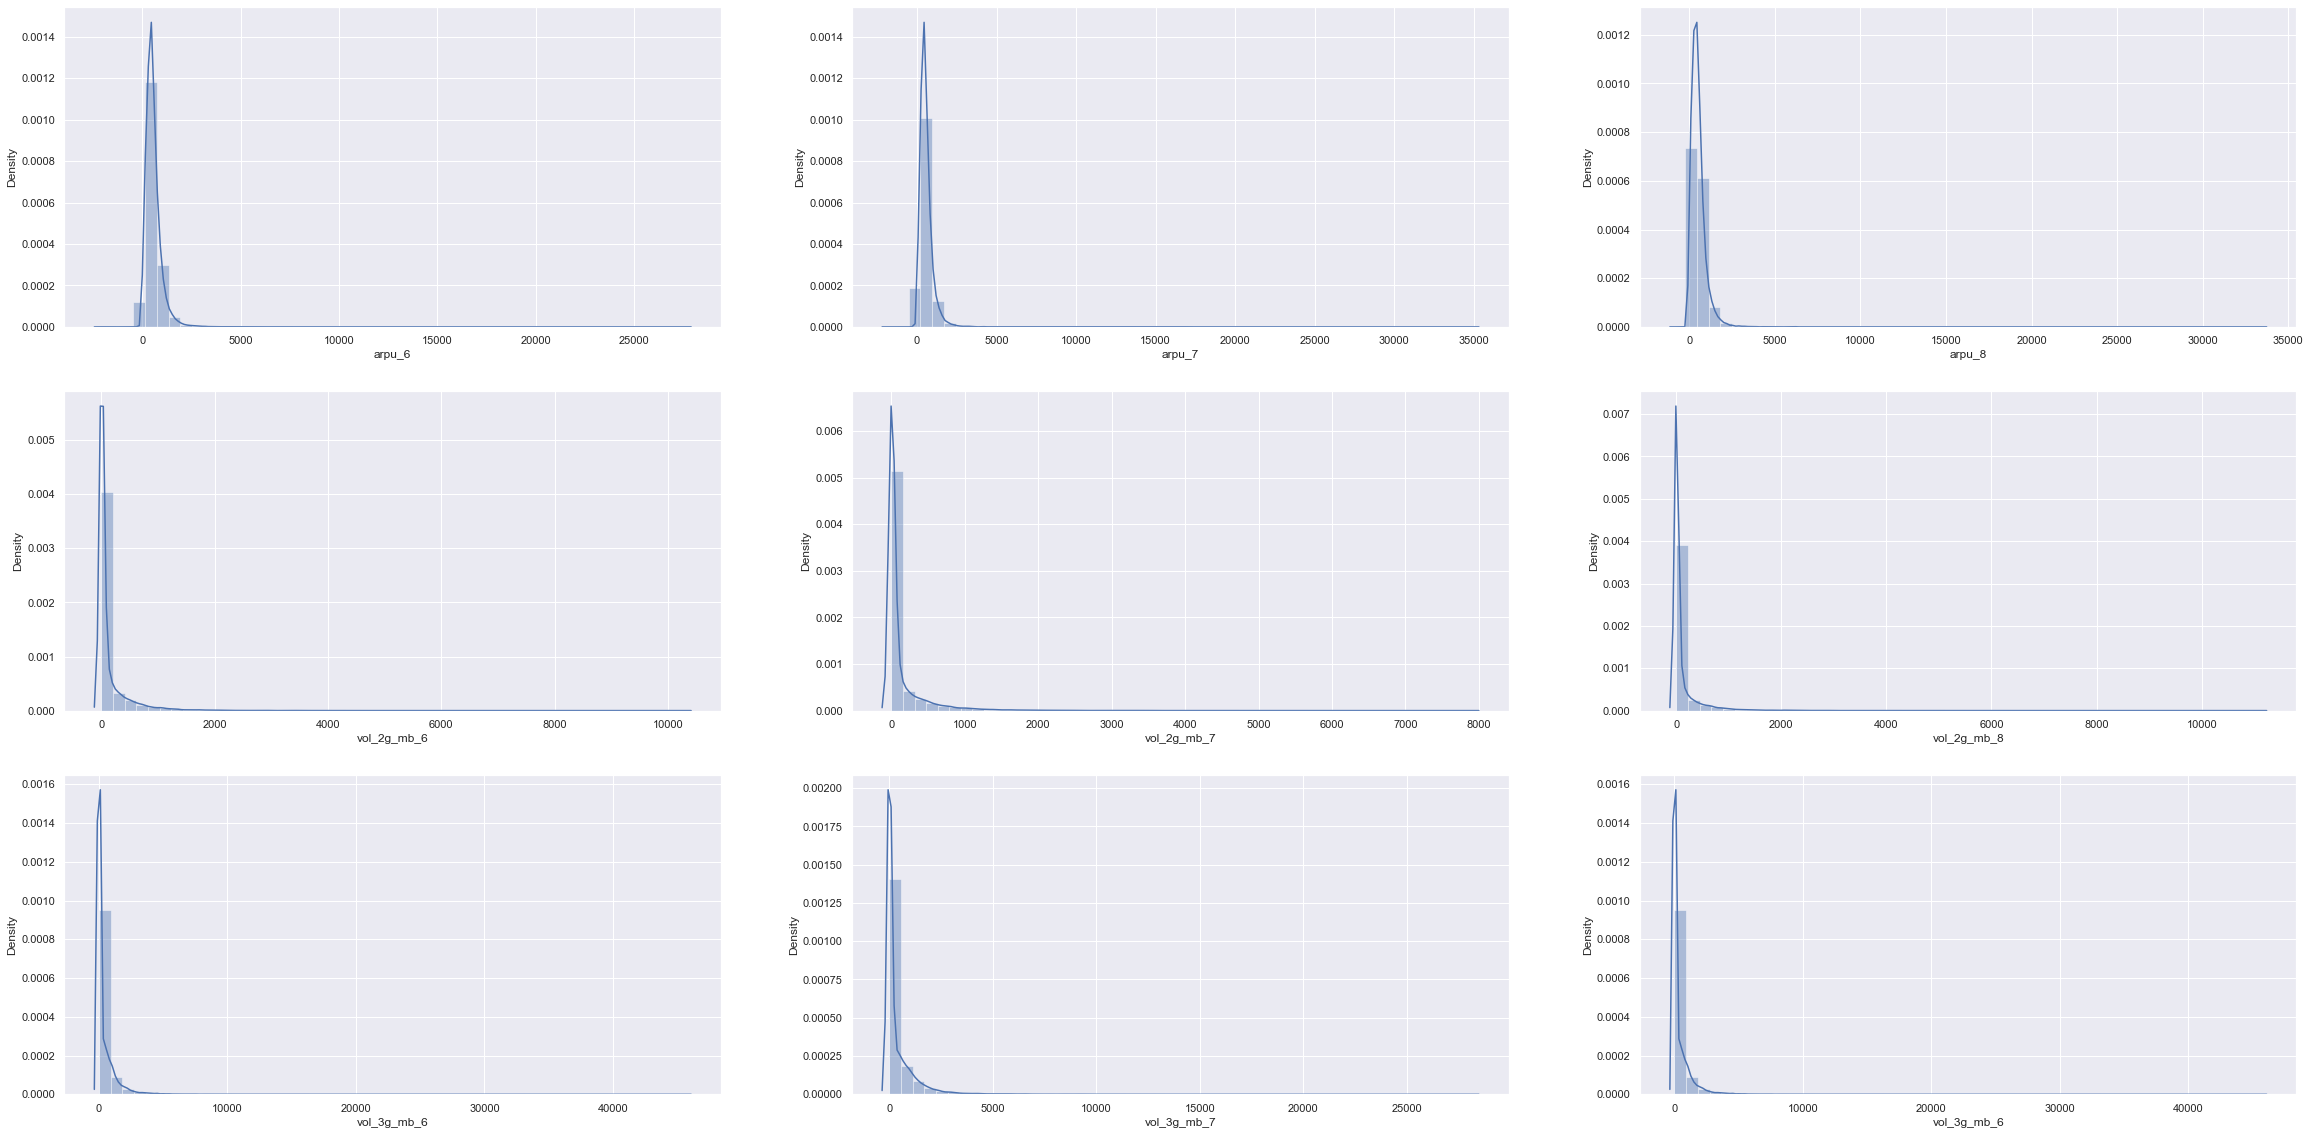

In [46]:
# Creating distplots to see few important attributes pattern
plt.subplots(figsize=(40,20))

plt.subplot(3, 3, 1)
sns.distplot(telecom_high_val.arpu_6)

plt.subplot(3, 3, 2)
sns.distplot(telecom_high_val.arpu_7)

plt.subplot(3, 3, 3)
sns.distplot(telecom_high_val.arpu_8)

plt.subplot(3, 3, 4)
sns.distplot(telecom_high_val.vol_2g_mb_6)

plt.subplot(3, 3, 5)
sns.distplot(telecom_high_val.vol_2g_mb_7)

plt.subplot(3, 3, 6)
sns.distplot(telecom_high_val.vol_2g_mb_8)

plt.subplot(3, 3, 7)
sns.distplot(telecom_high_val.vol_3g_mb_6)

plt.subplot(3, 3, 8)
sns.distplot(telecom_high_val.vol_3g_mb_7)

plt.subplot(3, 3, 9)
sns.distplot(telecom_high_val.vol_3g_mb_6)

plt.show()

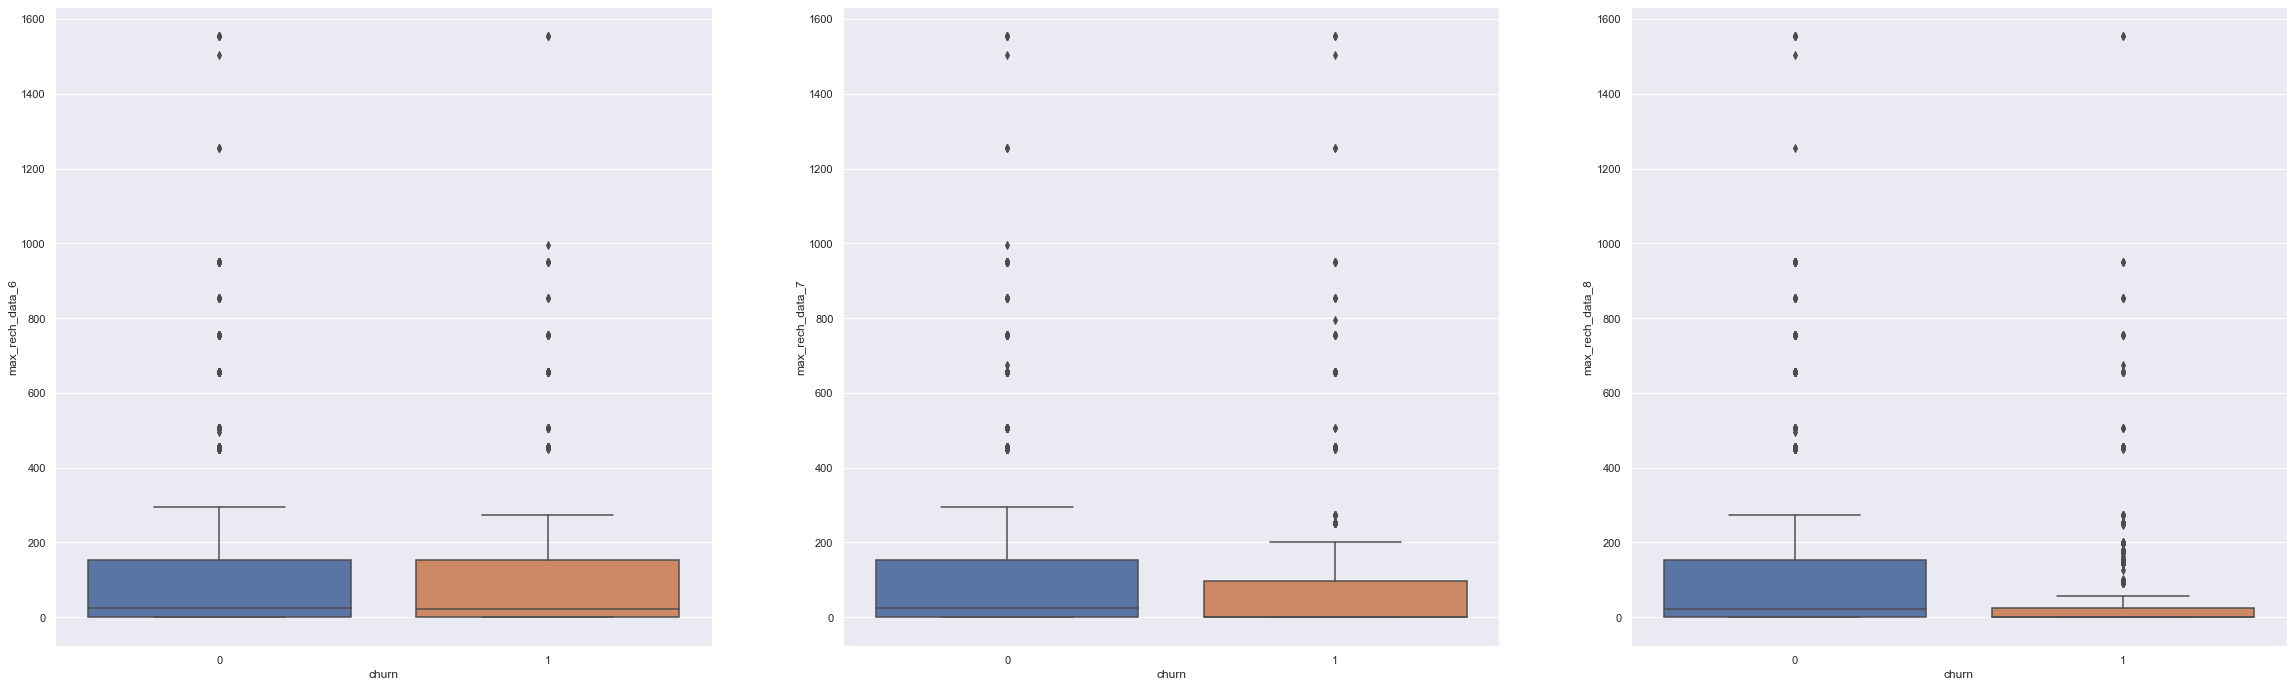

In [47]:
# Max_rech_data features plotting
plt.subplots(figsize=(40,40))

plt.subplot(3,3,1)
sns.boxplot(x='churn', y='max_rech_data_6', data = telecom_high_val)

plt.subplot(3,3,2)
sns.boxplot(x='churn', y='max_rech_data_7', data = telecom_high_val)

plt.subplot(3,3,3)
sns.boxplot(x='churn', y='max_rech_data_8', data = telecom_high_val)

plt.show ()

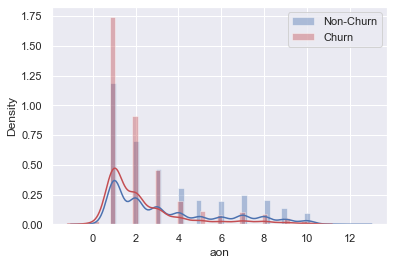

In [48]:
# Plot aon 
ax = sns.distplot(telecom_high_val.loc[telecom_high_val['churn']==0, ['aon']], color='b', label='Non-Churn')
ax = sns.distplot(telecom_high_val.loc[telecom_high_val['churn']==1, ['aon']], color='r', label='Churn')
ax.legend()
plt.xlabel('aon')
plt.show()

From above plots, we can see that for churned customers, AON is significantly less than non-churned customer

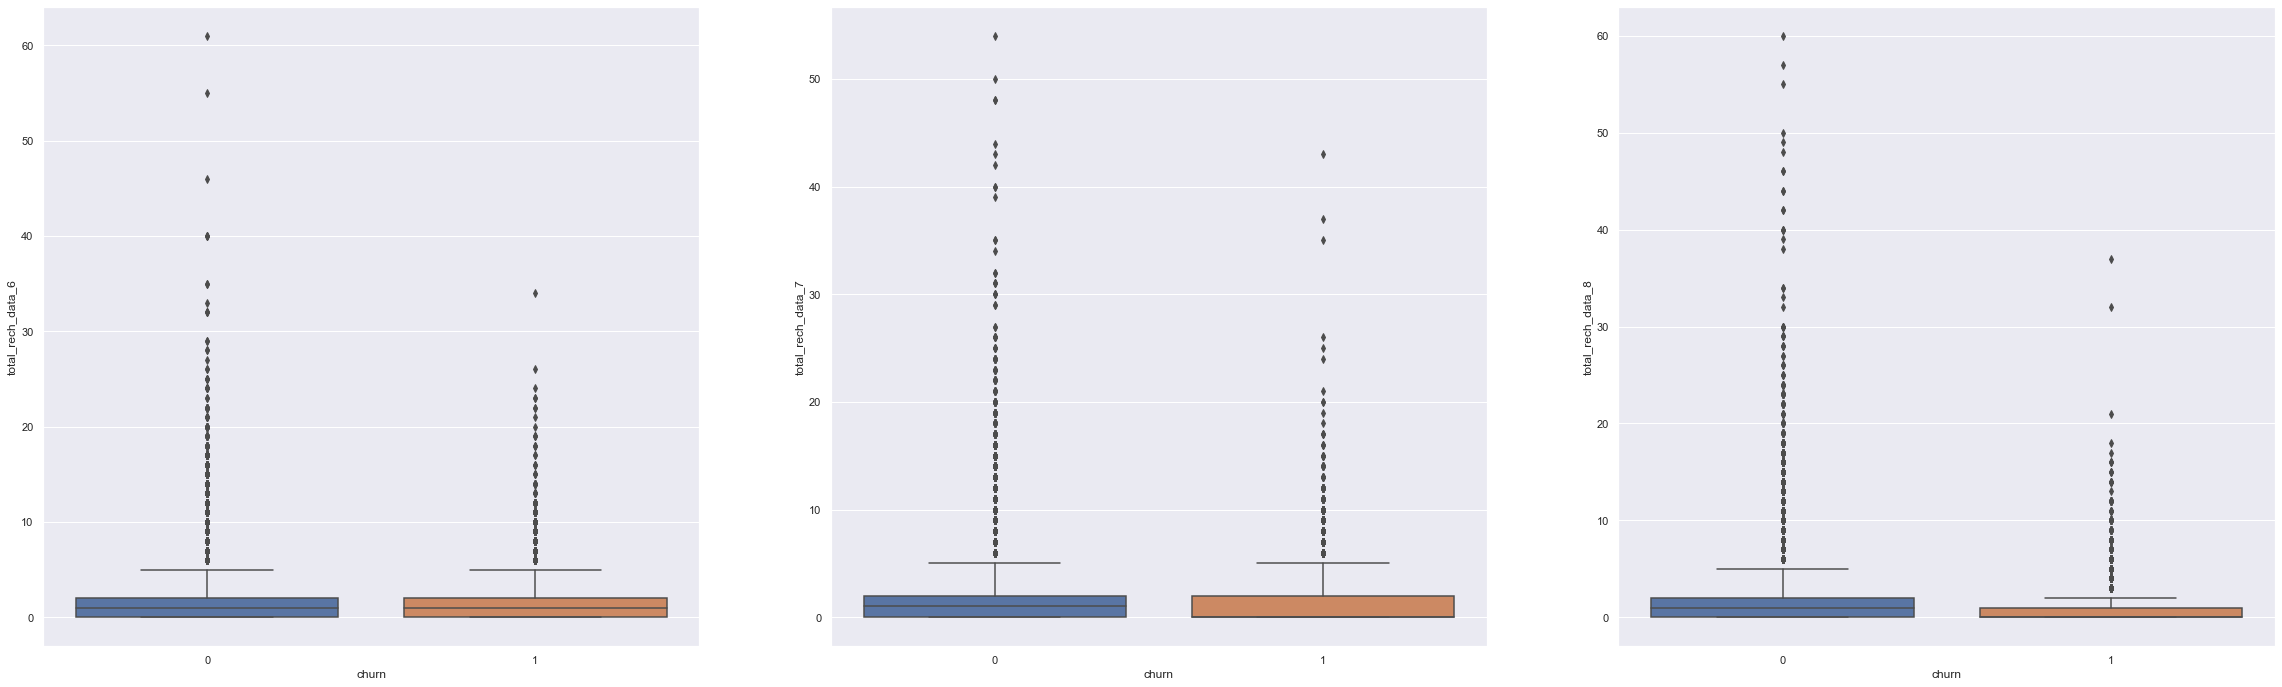

In [49]:
plt.subplots(figsize=(40,40))

plt.subplot(3,3,1)
sns.boxplot(x='churn', y='total_rech_data_6', data = telecom_high_val)

plt.subplot(3,3,2)
sns.boxplot(x='churn', y='total_rech_data_7', data = telecom_high_val)

plt.subplot(3,3,3)
sns.boxplot(x='churn', y='total_rech_data_8', data = telecom_high_val)
plt.show()

<b>Observation: </b> It can be seen from the above graph that total_rech_data_8 is lower for churned customer, whiel it has been more or less same for months 6 & 7.
So we can say that if the recharge amount decreases, thne probably the company needs to say give some offers to maintain the customer on its telecom network

# Step 2 : Modelling

In [50]:
# Dividing Training data into test and train sets for model building
X = telecom_high_val.drop('churn',axis=1)
y = telecom_high_val['churn']

In [51]:
# Split into test train
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.7, random_state = 100)

In [52]:
print('Shape of training data : ', X_train.shape)
print('--------------------')
print('Train data:')
print('Churn %: ', round(100*(len(y_train[y_train == 1])/len(y_train)), 2))
print('Non Churn %: ', round(100*(len(y_train[y_train == 0])/len(y_train)), 2))

print('--------------------')
print('Test data:')
print('Churn %: ', round(100*(len(y_test[y_test == 1])/len(y_test)), 2))
print('Non Churn %: ', round(100*(len(y_test[y_test == 0])/len(y_test)), 2))

Shape of training data :  (20967, 97)
--------------------
Train data:
Churn %:  11.07
Non Churn %:  88.93
--------------------
Test data:
Churn %:  10.38
Non Churn %:  89.62


As can be seen the data set is imbalanced since non churn has a higher percentage.
In such a scenario we can go for <b>SMOTE algorithm</b>. This algorithm creates new instances of the minority class by creating convex combinations of neighboring instances. 

### SMOTE

In [53]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 100)
X_smote, y_smote = sm.fit_resample(X_train, y_train)
    
X_train_smote = pd.DataFrame(X_smote, columns = X_train.columns)
y_train_smote = pd.Series(y_smote)
    
print('Churn %: ', round(100*(len(y_train_smote[y_train_smote == 1])/len(y_train_smote)), 2))
print('Non Churn %: ', round(100*(len(y_train_smote[y_train_smote == 0])/len(y_train_smote)), 2))


X_test_smote = X_test
y_test_smote = y_test

Churn %:  50.0
Non Churn %:  50.0


### Scaling

In [54]:
scaler = StandardScaler()
# Perform Fit and Transform on Training Data
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

# Perform only Transform on Test Data
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

### PCA scaled

In [55]:
from sklearn.decomposition import PCA 
pca = PCA(svd_solver='randomized', random_state = 100)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

y_train_pca = y_train
y_test_pca = y_test

In [56]:
pca.components_

array([[-4.84581240e-02, -4.53465371e-02, -2.85365907e-02, ...,
         4.32742806e-02,  1.47110823e-01,  1.63911169e-01],
       [ 2.42952204e-01,  2.58383418e-01,  2.55953248e-01, ...,
         3.56292792e-02, -1.40164421e-02, -2.28426856e-02],
       [ 1.24322440e-01,  1.47853791e-01,  1.37634756e-01, ...,
         3.71960370e-02,  1.54975298e-01,  1.85138426e-01],
       ...,
       [-9.93562439e-02,  9.53111506e-02, -6.46214391e-03, ...,
         2.91707662e-03, -2.49186817e-01,  1.85560345e-01],
       [ 9.75855132e-03, -1.29692725e-02, -4.59831370e-03, ...,
         4.47651123e-04,  3.96151555e-04,  4.07110327e-04],
       [-3.41197376e-04, -7.46816692e-04,  2.41573196e-04, ...,
         1.08359239e-04,  3.89090838e-06, -3.80712191e-05]])

### PCA and SMOTE

In [57]:
pca1 = PCA(svd_solver='randomized', random_state = 100)

X_train_smote_pca = pca1.fit_transform(X_train_smote)
y_train_smote_pca = y_train_smote

X_test_smote_pca = pca1.transform(X_test_smote)
y_test_smote_pca = y_test

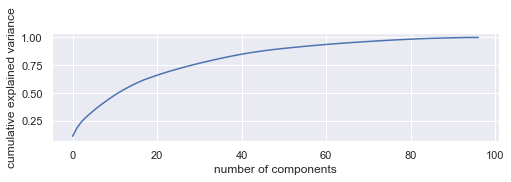

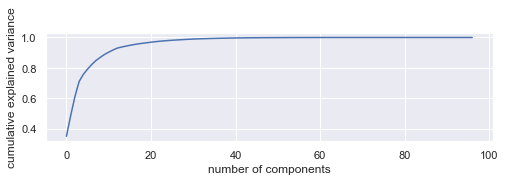

In [58]:
# Scree plt
%matplotlib inline
fig = plt.figure(figsize = (8,2))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

%matplotlib inline
fig = plt.figure(figsize = (8,2))
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Both the plots show that around 30 components explain almost 80% of the variance data 

# Model Building

In [59]:
# Generic function for evaluating model stats
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score

model_score_list = []

def model_score(y_true, y_pred, model_name='Default'):
    fp, tp, thresholds = roc_curve(y_test, y_pred)
    roc_auc = round(auc(fp, tp), 2)
    
    acc_score = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    
    print('False Positive Rate : ', fp)
    print('True Positive Rate : ', tp)
    print('ROC AUC Score : ', roc_auc)
    print('Accuracy Score : ', acc_score)
    print('Precision Score : ', precision)
    print('Recall Score : ', recall)
    print('F1 Score : ', f1_score(y_true, y_pred))
    print('Confusion Matrix : \n {}'.format(confusion_matrix(y_true, y_pred)))
    print('Classification Report : \n {}'.format(classification_report(y_true, y_pred)))
    
    plt.figure(figsize=(6, 6))
    plt.plot( fp, tp, label='ROC curve (area = %0.2f)' % roc_auc )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
        
    if model_name != 'Default':
        model_score_list.append({'model_name': model_name, 'accuracy':acc_score, 'roc_auc':roc_auc, 'precision': precision, 'recall': recall})

# Logistic Regression

False Positive Rate :  [0.         0.01825407 1.        ]
True Positive Rate :  [0.         0.31189711 1.        ]
ROC AUC Score :  0.65
Accuracy Score :  0.912196750500779
Precision Score :  0.6643835616438356
Recall Score :  0.31189710610932475
F1 Score :  0.424507658643326
Confusion Matrix : 
 [[7906  147]
 [ 642  291]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      8053
           1       0.66      0.31      0.42       933

    accuracy                           0.91      8986
   macro avg       0.79      0.65      0.69      8986
weighted avg       0.90      0.91      0.90      8986



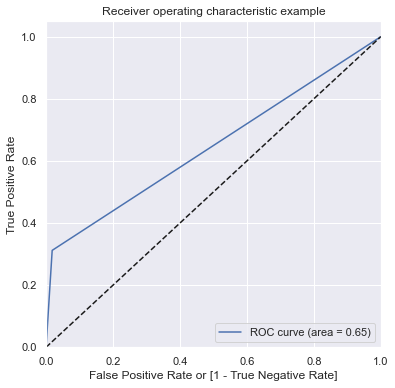

In [60]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

model_score(y_test, y_pred_log_reg, 'Logistic Regression')

# Logistic regression with PCA

False Positive Rate :  [0.         0.01825407 1.        ]
True Positive Rate :  [0.         0.31189711 1.        ]
ROC AUC Score :  0.65
Accuracy Score :  0.912196750500779
Precision Score :  0.6643835616438356
Recall Score :  0.31189710610932475
F1 Score :  0.424507658643326
Confusion Matrix : 
 [[7906  147]
 [ 642  291]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      8053
           1       0.66      0.31      0.42       933

    accuracy                           0.91      8986
   macro avg       0.79      0.65      0.69      8986
weighted avg       0.90      0.91      0.90      8986



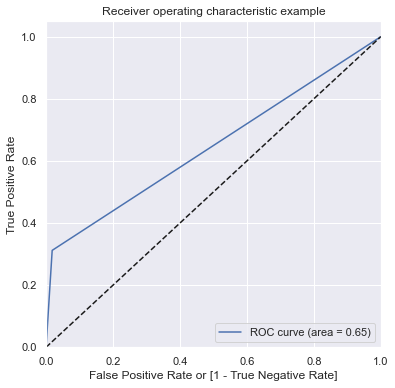

In [61]:
from sklearn.preprocessing import StandardScaler

log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_train_pca, y_train_pca)

y_pred_log_reg_pca = log_reg_pca.predict(X_test_pca)

model_score(y_test_pca, y_pred_log_reg_pca, 'Logistic Regression with PCA')

# Logistic SMOTE without PCA

False Positive Rate :  [0.        0.1976903 1.       ]
True Positive Rate :  [0.         0.78563773 1.        ]
ROC AUC Score :  0.79
Accuracy Score :  0.8005786779434676
Precision Score :  0.31526881720430106
Recall Score :  0.7856377277599143
F1 Score :  0.4499693063228975
Confusion Matrix : 
 [[6461 1592]
 [ 200  733]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.80      0.88      8053
           1       0.32      0.79      0.45       933

    accuracy                           0.80      8986
   macro avg       0.64      0.79      0.66      8986
weighted avg       0.90      0.80      0.83      8986



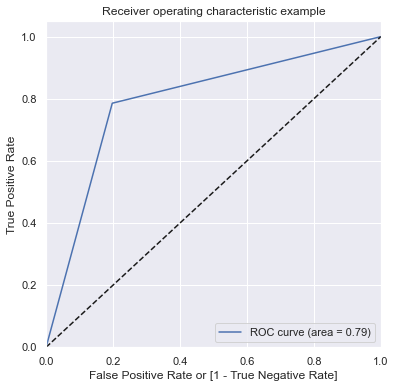

In [62]:
log_reg_smote_model = LogisticRegression()
log_reg_smote_model.fit(X_train_smote, y_train_smote)

y_pred_log_reg_smote = log_reg_smote_model.predict(X_test_smote)

model_score(y_test_smote, y_pred_log_reg_smote, 'Logistic SMOTE without PCA')

# Logistic SMOTE with PCA

False Positive Rate :  [0.        0.2842419 1.       ]
True Positive Rate :  [0.         0.85316184 1.        ]
ROC AUC Score :  0.78
Accuracy Score :  0.7300244825283775
Precision Score :  0.2580226904376013
Recall Score :  0.8531618435155413
F1 Score :  0.3962170233947237
Confusion Matrix : 
 [[5764 2289]
 [ 137  796]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.72      0.83      8053
           1       0.26      0.85      0.40       933

    accuracy                           0.73      8986
   macro avg       0.62      0.78      0.61      8986
weighted avg       0.90      0.73      0.78      8986



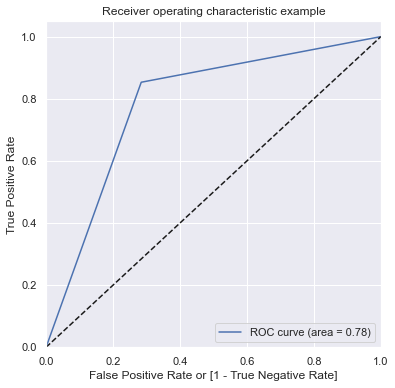

In [63]:
log_reg_smote_pca_model = LogisticRegression()
log_reg_smote_pca_model.fit(X_train_smote_pca, y_train_smote_pca)

y_pred_smote_pca = log_reg_smote_pca_model.predict(X_test_smote_pca)

model_score(y_test_smote_pca, y_pred_smote_pca, 'Logistic SMOTE with PCA')

# Decision Tree

False Positive Rate :  [0.         0.02272445 1.        ]
True Positive Rate :  [0.         0.42336549 1.        ]
ROC AUC Score :  0.7
Accuracy Score :  0.919764077453817
Precision Score :  0.6833910034602076
Recall Score :  0.42336548767416937
F1 Score :  0.5228325612177367
Confusion Matrix : 
 [[7870  183]
 [ 538  395]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      8053
           1       0.68      0.42      0.52       933

    accuracy                           0.92      8986
   macro avg       0.81      0.70      0.74      8986
weighted avg       0.91      0.92      0.91      8986



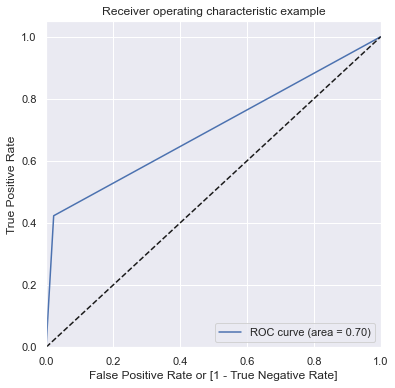

In [64]:
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

# Making predictions
y_pred_default = dt_default.predict(X_test)

model_score(y_test, y_pred_default, 'Decision Tree')

# Gridsearch CV to find optimal depth


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 30)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

scores = tree.cv_results_
pd.DataFrame(scores).head()

plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<b>Observation: </b> As can be seen from above train and test score are closer till around max_depth = 3, post which the scores differ a lot

In [65]:
#Now we will be running the model with grid search to find the optimal hyper parameters
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [66]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.430411,0.012983,0.001184,0.002367,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.915832,0.917501,0.918197,0.914143,0.916766,0.916488,0.001411,7
1,0.422934,0.007787,0.005752,0.003193,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.915832,0.917501,0.918197,0.914143,0.916766,0.916488,0.001411,7
2,0.438972,0.029603,0.004627,0.003975,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.911063,0.913209,0.916289,0.912235,0.914620,0.913483,0.001825,15
3,0.431144,0.023581,0.005361,0.004447,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.911063,0.913209,0.916289,0.912235,0.914620,0.913483,0.001825,15
4,0.776379,0.033904,0.000977,0.001954,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.913209,0.917978,0.921536,0.914381,0.915335,0.916488,0.002974,5
5,0.726750,0.026246,0.004105,0.004301,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.913209,0.917978,0.921536,0.914381,0.915335,0.916488,0.002974,5
6,0.675583,0.007062,0.001318,0.001077,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.910348,0.916547,0.921059,0.909611,0.913427,0.914199,0.004220,13
7,0.676848,0.011427,0.000447,0.000893,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.910348,0.916547,0.921059,0.909611,0.913427,0.914199,0.004220,13
8,0.327608,0.010496,0.004202,0.003697,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.912017,0.917978,0.921536,0.915335,0.915097,0.916393,0.003191,9
9,0.516776,0.044772,0.006946,0.002933,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.912017,0.917978,0.921536,0.915335,0.915097,0.916393,0.003191,9


In [67]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9169170954019806
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [68]:
# building model based on above derived 
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=100,
                       min_samples_split=50, random_state=100)

False Positive Rate :  [0.         0.02707066 1.        ]
True Positive Rate :  [0.         0.44480171 1.        ]
ROC AUC Score :  0.71
Accuracy Score :  0.9180948141553528
Precision Score :  0.655608214849921
Recall Score :  0.44480171489817794
F1 Score :  0.5300127713920818
Confusion Matrix : 
 [[7835  218]
 [ 518  415]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      8053
           1       0.66      0.44      0.53       933

    accuracy                           0.92      8986
   macro avg       0.80      0.71      0.74      8986
weighted avg       0.91      0.92      0.91      8986



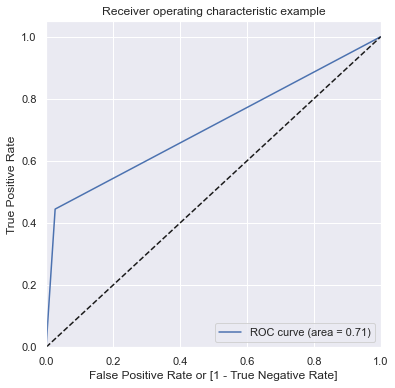

In [69]:
y_pred = clf_gini.predict(X_test)
model_score(y_test, y_pred, 'Decision Tree with Hyperparams')

# Random Forest

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


False Positive Rate :  [0.         0.01676394 1.        ]
True Positive Rate :  [0.         0.43086817 1.        ]
ROC AUC Score :  0.71
Accuracy Score :  0.925884709548186
Precision Score :  0.7486033519553073
Recall Score :  0.43086816720257237
F1 Score :  0.5469387755102041
Confusion Matrix : 
 [[7918  135]
 [ 531  402]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      8053
           1       0.75      0.43      0.55       933

    accuracy                           0.93      8986
   macro avg       0.84      0.71      0.75      8986
weighted avg       0.92      0.93      0.92      8986



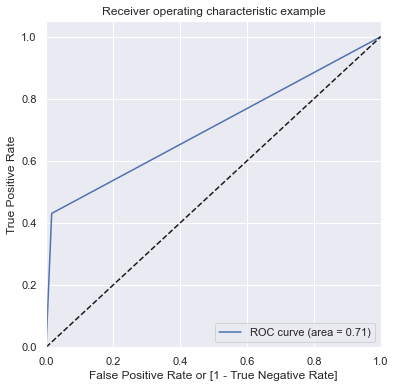

Out of Bag Error : 0.9204464157962513


In [70]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with 13 trees
rf = RandomForestClassifier(random_state = 100, oob_score = True, warm_start = True, 
                                                     verbose = 1, n_jobs= -1)
rf.fit(X_train,y_train)

# Making predictions
y_pred_rf = rf.predict(X_test)

model_score(y_test, y_pred_rf, 'Random Forest')
print('Out of Bag Error : {}'.format(rf.oob_score_))

## Grid search to find optimal parameters for Random Forests

In [71]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,12,16,20],
    'min_samples_leaf': range(10, 20, 30),
    'min_samples_split': range(10, 30, 50),
    'n_estimators': [5,10,15,20], 
    'max_features': [5, 10, 15]
}
# Create a based model
rf_cv = RandomForestClassifier(class_weight='balanced_subsample')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, scoring = 'roc_auc')


# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.7s finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=100, verbose=1,
                                              warm_start=True),
             n_jobs=-1,
             param_grid={'max_depth': [4, 8, 12, 16, 20],
                         'max_features': [5, 10, 15],
                         'min_samples_leaf': range(10, 20, 30),
                         'min_samples_split': range(10, 30, 50),
                         'n_estimators': [5, 10, 15, 20]},
             scoring='roc_auc', verbose=1)

In [72]:
#optimal accuracy score and hyperparameters
print(grid_search.best_score_)

print(grid_search.best_params_)

0.9091818576794909
{'max_depth': 20, 'max_features': 15, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 20}


# Random forest with hyperparameters

In [73]:
# building model with the best params derived above

rf_cv = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=10, 
                             min_samples_split=10,
                             max_features=15,
                             n_estimators=20)

# fit
rf_cv.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features=15, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=20)

False Positive Rate :  [0.         0.01564634 1.        ]
True Positive Rate :  [0.         0.40407288 1.        ]
ROC AUC Score :  0.69
Accuracy Score :  0.9241041620298241
Precision Score :  0.7495029821073559
Recall Score :  0.4040728831725616
F1 Score :  0.5250696378830083
Confusion Matrix : 
 [[7927  126]
 [ 556  377]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      8053
           1       0.75      0.40      0.53       933

    accuracy                           0.92      8986
   macro avg       0.84      0.69      0.74      8986
weighted avg       0.92      0.92      0.91      8986



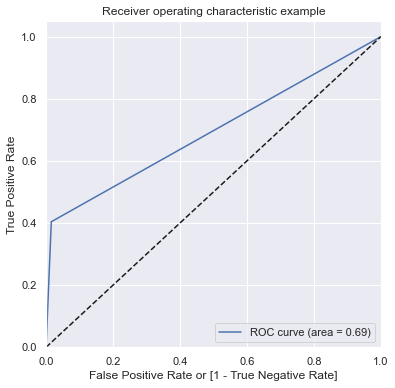

In [74]:
# predict
y_pred_rf = rf_cv.predict(X_test)

model_score(y_test, y_pred_rf, 'Random Forest with hyperparameters')

# XGBoost

[21:49:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
False Positive Rate :  [0.         0.02868496 1.        ]
True Positive Rate :  [0.         0.51018221 1.        ]
ROC AUC Score :  0.74
Accuracy Score :  0.9234364567104385
Precision Score :  0.6732673267326733
Recall Score :  0.5101822079314041
F1 Score :  0.5804878048780489
Confusion Matrix : 
 [[7822  231]
 [ 457  476]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      8053
           1       0.67      0.51      0.58       933

    accuracy                           0.92      8986
   macro avg       0.81      0.74      0.77      8986
weighted avg       0.92      0.92      0.92      8986



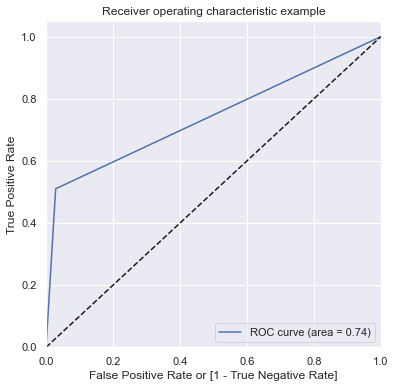

In [75]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state = 100, verbosity = 1)

xg.fit(X_train, y_train)

y_pred_xg = xg.predict(X_test)

model_score(y_test, y_pred_xg, 'XGBoost')

In [76]:
# above is with defaut hyper parameters

# Tuning params using gridCV

# creating a KFold object 
folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2,0.3], 
             'subsample': [0.3,0.4,0.5]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'accuracy',
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)    

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[21:51:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [77]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,23.457951,0.331316,0.037859,0.011289,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.917501,0.925608,0.928214,0.921774,0.921536,0.922927,0.003683,4,0.929470,0.927383,0.926374,0.928043,0.930607,0.928376,0.001502
1,25.095373,1.809260,0.044522,0.018322,0.1,0.4,"{'learning_rate': 0.1, 'subsample': 0.4}",0.918693,0.925370,0.929645,0.923444,0.919628,0.923356,0.003981,2,0.930126,0.927920,0.926315,0.928938,0.929832,0.928626,0.001389
2,27.326709,0.370641,0.036075,0.008753,0.1,0.5,"{'learning_rate': 0.1, 'subsample': 0.5}",0.917740,0.926085,0.930599,0.918435,0.918197,0.922211,0.005210,6,0.930364,0.927979,0.926613,0.929236,0.929176,0.928674,0.001277
3,26.144576,0.528162,0.042385,0.005623,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.918693,0.924177,0.928691,0.919151,0.922251,0.922593,0.003657,5,0.936565,0.932928,0.930547,0.935018,0.935495,0.934111,0.002138
4,26.712033,0.819000,0.037541,0.007871,0.2,0.4,"{'learning_rate': 0.2, 'subsample': 0.4}",0.919409,0.927992,0.931076,0.922251,0.920343,0.924214,0.004545,1,0.936267,0.933882,0.932515,0.936330,0.936568,0.935112,0.001625
5,28.480792,0.422976,0.036470,0.007273,0.2,0.5,"{'learning_rate': 0.2, 'subsample': 0.5}",0.920124,0.924416,0.929168,0.920343,0.922728,0.923356,0.003311,3,0.936624,0.934836,0.932753,0.934840,0.936270,0.935065,0.001366
6,27.335443,1.010429,0.034703,0.004859,0.3,0.3,"{'learning_rate': 0.3, 'subsample': 0.3}",0.911779,0.921793,0.928929,0.917005,0.915335,0.918968,0.005932,9,0.940082,0.935730,0.934601,0.936986,0.937761,0.937032,0.001868
7,27.070650,0.206633,0.037331,0.006496,0.3,0.4,"{'learning_rate': 0.3, 'subsample': 0.4}",0.918216,0.920839,0.930599,0.914143,0.917243,0.920208,0.005620,8,0.941334,0.937936,0.937701,0.940503,0.937701,0.939035,0.001563
8,19.032056,0.484283,0.026510,0.009239,0.3,0.5,"{'learning_rate': 0.3, 'subsample': 0.5}",0.920601,0.921555,0.927021,0.917959,0.917243,0.920876,0.003464,7,0.942288,0.937697,0.938119,0.939311,0.941874,0.939858,0.001895


In [78]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", model_cv.best_score_)
print(model_cv.best_estimator_)

best accuracy 0.9242142904340988
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.4,
              tree_method='exact', validate_parameters=1, verbosity=None)


[21:51:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "params" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:51:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
False Positive Rate :  [0.         0.02868496 1.        ]
True Positive Rate :  [0.         0.51018221 1.        ]
ROC AUC Score :  0.74
Accuracy Score :  0.9234364567104385
Precision Score :  0.6732673267326733
Recall Score :  0.5101822079314041
F1 Score :  0.5804878048780489
Confusion Matrix : 
 [[782

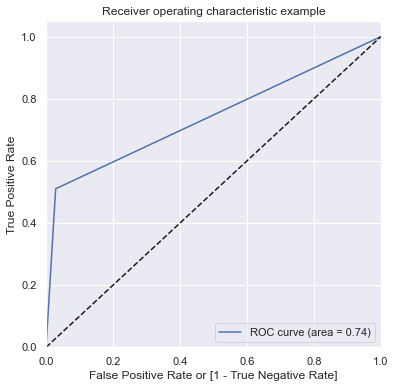

In [79]:
# building model based on best score returned
params = {'learning_rate': 0.3,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.5}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train, y_train)

# predict
y_pred_xgb = model.predict(X_test)

model_score(y_test, y_pred_xgb, 'XGBoost with hyper parameters')

In [80]:
# convert the model scores to dataframe
model_score_df = pd.DataFrame(model_score_list,columns=['model_name', 'accuracy', 'roc_auc','precision','recall'])

# Order by highest recall score and roc_auc_score
model_score_df.sort_values(['precision','recall'], ascending=False)

,model_name,accuracy,roc_auc,precision,recall
7,Random Forest with hyperparameters,0.924104,0.69,0.749503,0.404073
6,Random Forest,0.925885,0.71,0.748603,0.430868
4,Decision Tree,0.919764,0.70,0.683391,0.423365
8,XGBoost,0.923436,0.74,0.673267,0.510182
9,XGBoost with hyper parameters,0.923436,0.74,0.673267,0.510182
0,Logistic Regression,0.912197,0.65,0.664384,0.311897
1,Logistic Regression with PCA,0.912197,0.65,0.664384,0.311897
5,Decision Tree with Hyperparams,0.918095,0.71,0.655608,0.444802
2,Logistic SMOTE without PCA,0.800579,0.79,0.315269,0.785638
3,Logistic SMOTE with PCA,0.730024,0.78,0.258023,0.853162


<B>Conclusion</B> Based on the above we can come to conclusion that Random forest gives the best results.  

# Step 3: Identifying important churn indicators and business recommendation

In [81]:
# Apply Random Forest on non PCA applied data

plot_data= telecom_high_val.copy()

# Dividing Training data into test and train sets for model building
X = telecom_high_val.drop('churn',axis=1)
y = telecom_high_val['churn']

rf_feature = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=10, 
                             min_samples_split=10,
                             max_features=15,
                             n_estimators=20, random_state = 100)
rf_feature.fit(X, y)


RandomForestClassifier(max_depth=8, max_features=15, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=20, random_state=100)

In [82]:
# now check feature importance

from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(rf_feature)
sel.fit(X, y)

imp_features_results = pd.DataFrame(list(zip(X.columns, sel.get_support(), 
                                            rf_feature.feature_importances_)))
imp_features_results.columns = ('column_name', 'support', 'importance')
imp_features_results = imp_features_results[imp_features_results['support'] == True]
imp_features_results.reset_index(inplace = True, drop = True)
imp_features_results.drop('support', axis = 1, inplace = True)
imp_features_results = imp_features_results.sort_values(by='importance', ascending = False)
kpi_results = imp_features_results['column_name']
display(imp_features_results)

,column_name,importance
2,offnet_mou_8,0.164996
11,max_rech_amt_8,0.164678
8,loc_ic_t2f_mou_8,0.080594
0,arpu_8,0.058581
10,total_rech_num_8,0.047060
12,last_day_rch_amt_8,0.041447
9,std_ic_t2m_mou_8,0.026467
6,std_og_mou_8,0.026159
15,vol_2g_mb_8,0.023815
7,loc_ic_t2m_mou_7,0.021219


<AxesSubplot:>

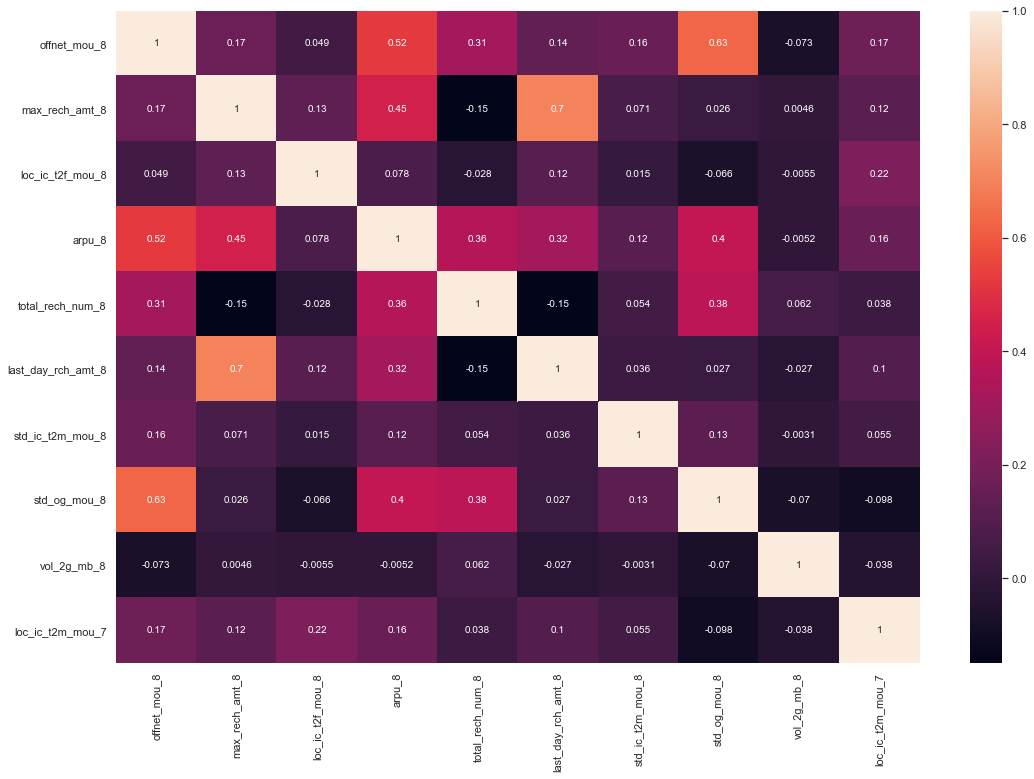

In [83]:
# Heatmap of top 10 features
top_10 = imp_features_results[:10]['column_name']
plt.figure(figsize=(18,12))
sns.heatmap(X[top_10].corr(), annot=True)

In [84]:
# Plot for above parameters for churn vs non churn

In [85]:
cols = top_10
plot_data = plot_data[cols]
plot_data['churn'] = telecom_high_val['churn']
plot_data.dtypes

offnet_mou_8          float64
max_rech_amt_8          int64
loc_ic_t2f_mou_8      float64
arpu_8                float64
total_rech_num_8        int64
last_day_rch_amt_8      int64
std_ic_t2m_mou_8      float64
std_og_mou_8          float64
vol_2g_mb_8           float64
loc_ic_t2m_mou_7      float64
churn                   int32
dtype: object

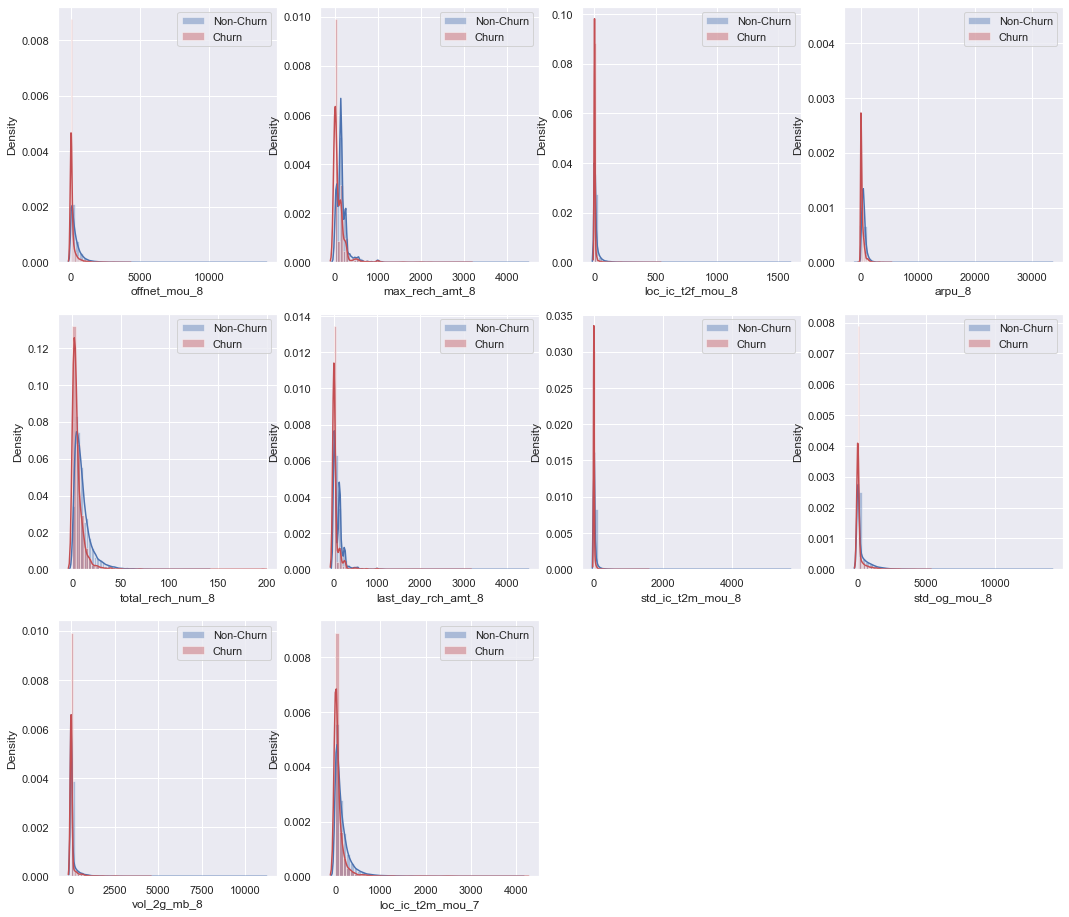

In [86]:
plt.figure(figsize=(18,16))

for i, col in enumerate(cols):

    plt.subplot(3,4,i+1)
    ax = sns.distplot(plot_data.loc[plot_data['churn']==0, [col]], color='b', label='Non-Churn')
    ax = sns.distplot(plot_data.loc[plot_data['churn']==1, [col]], color='r', label='Churn')
    ax.legend()
    plt.xlabel(col)
    

Conclusion:
- total_rech_num_8 is a strong indicator for churn / non churn. Overall variables related to the 8th month are strong indicators for churn - non churn identification - in most variables it can be seen that a dip in 8th month is noticed 
- Customers will AON (tenure) less than 1 year are more likely to churn
- STD rates are also a major driving factor